# Assignment (III)

---


##Please write your full name/names and student IDs here:




*   Full Name: Omid Farahmand, Erfan YousefMoumji
*   Student ID: 218140863, 217747775



---


#Question 1. (3 points)
* **For this question, please follow the steps outlined below:**
## Part (a):

* **Data Loading:** Read the lymph dataset from your mounted Google Drive using Pandas.

* **Data Splitting:** Split the dataset randomly into a 60% training set and a 40% test set using scikit-learn's train_test_split function.

* **Handling Categorical Data:** Encode categorical attributes with one-hot encoding using pandas.get_dummies, dropping the first attribute to avoid redundancy.

* **Decision Tree Classifier (1st Experiment):** Train a Decision Tree classifier in scikit-learn on the training data, setting the splitting criterion to "entropy," and requiring a minimum of 4 samples to split an internal node. Keep other settings unchanged.

* **Reproducibility:** Set the random_state to 32 in train_test_split and DecisionTreeClassifier to make your codes reproducible.

* **Performance Evaluation (1st Experiment):** Report the Decision Tree classifier's accuracy on the test data. Also, generate a high-resolution tree visualization (use plt.figure(figsize=(12, 8), dpi=300)).





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Decision Tree Accuracy (min_samples_split=4): 0.8833333333333333


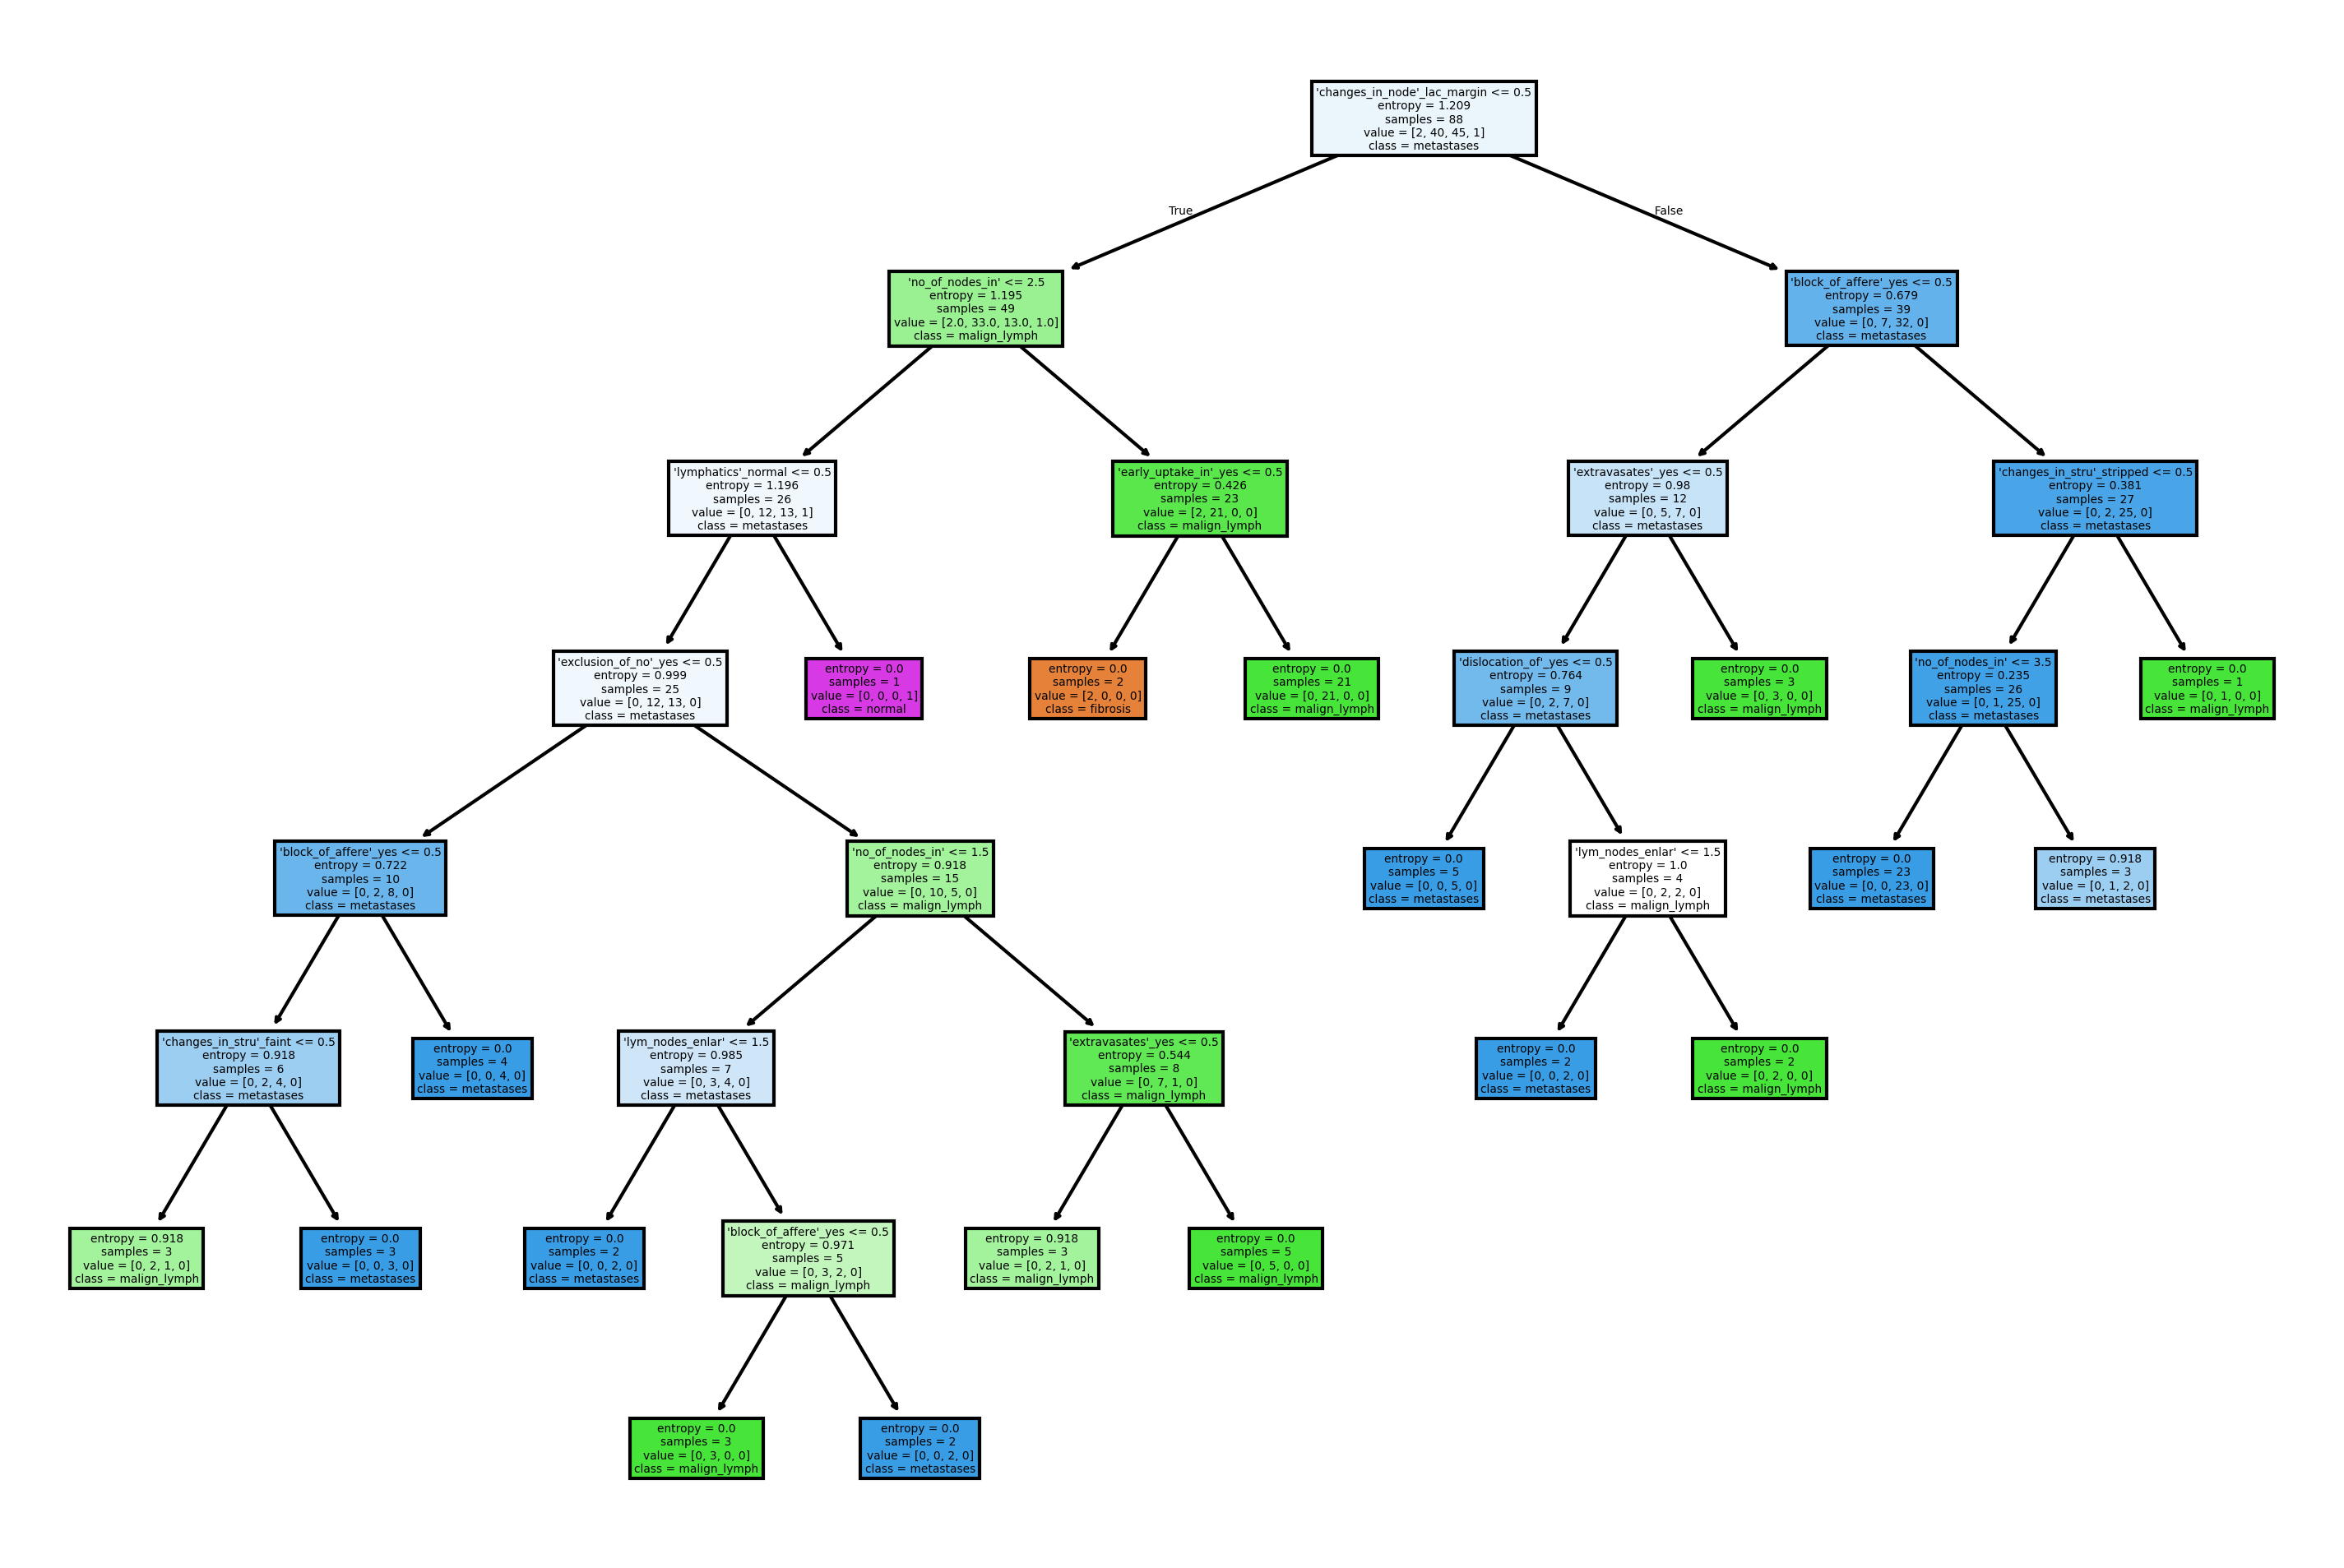

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/EECS4412/a3/lymph.csv")  # Load your dataset

#.............................................................................
# write the rest here


# Separate features and target (assuming the last column is the target)
target_col = df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical attributes using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training (60%) and testing (40%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.4, random_state=32
)

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", min_samples_split=4, random_state=32)
dt_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy (min_samples_split=4):", accuracy)

# Plot the constructed Decision Tree
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(
    dt_classifier,
    filled=True,
    feature_names=X_train.columns,
    class_names=dt_classifier.classes_
)
plt.show()


#.............................................................................


## Part (b):


Modify the minimum samples required for splitting to 32 and re-run the experiment. Report the accuracy of the Decision Tree classifier with the modified parameter and create a visualization of the tree. Discuss the differences between the two Decision Trees and their respective results, highlighting how changing the minimum samples for splitting affects the tree structure and performance.


Decision Tree Accuracy (min_samples_split=32): 0.7666666666666667


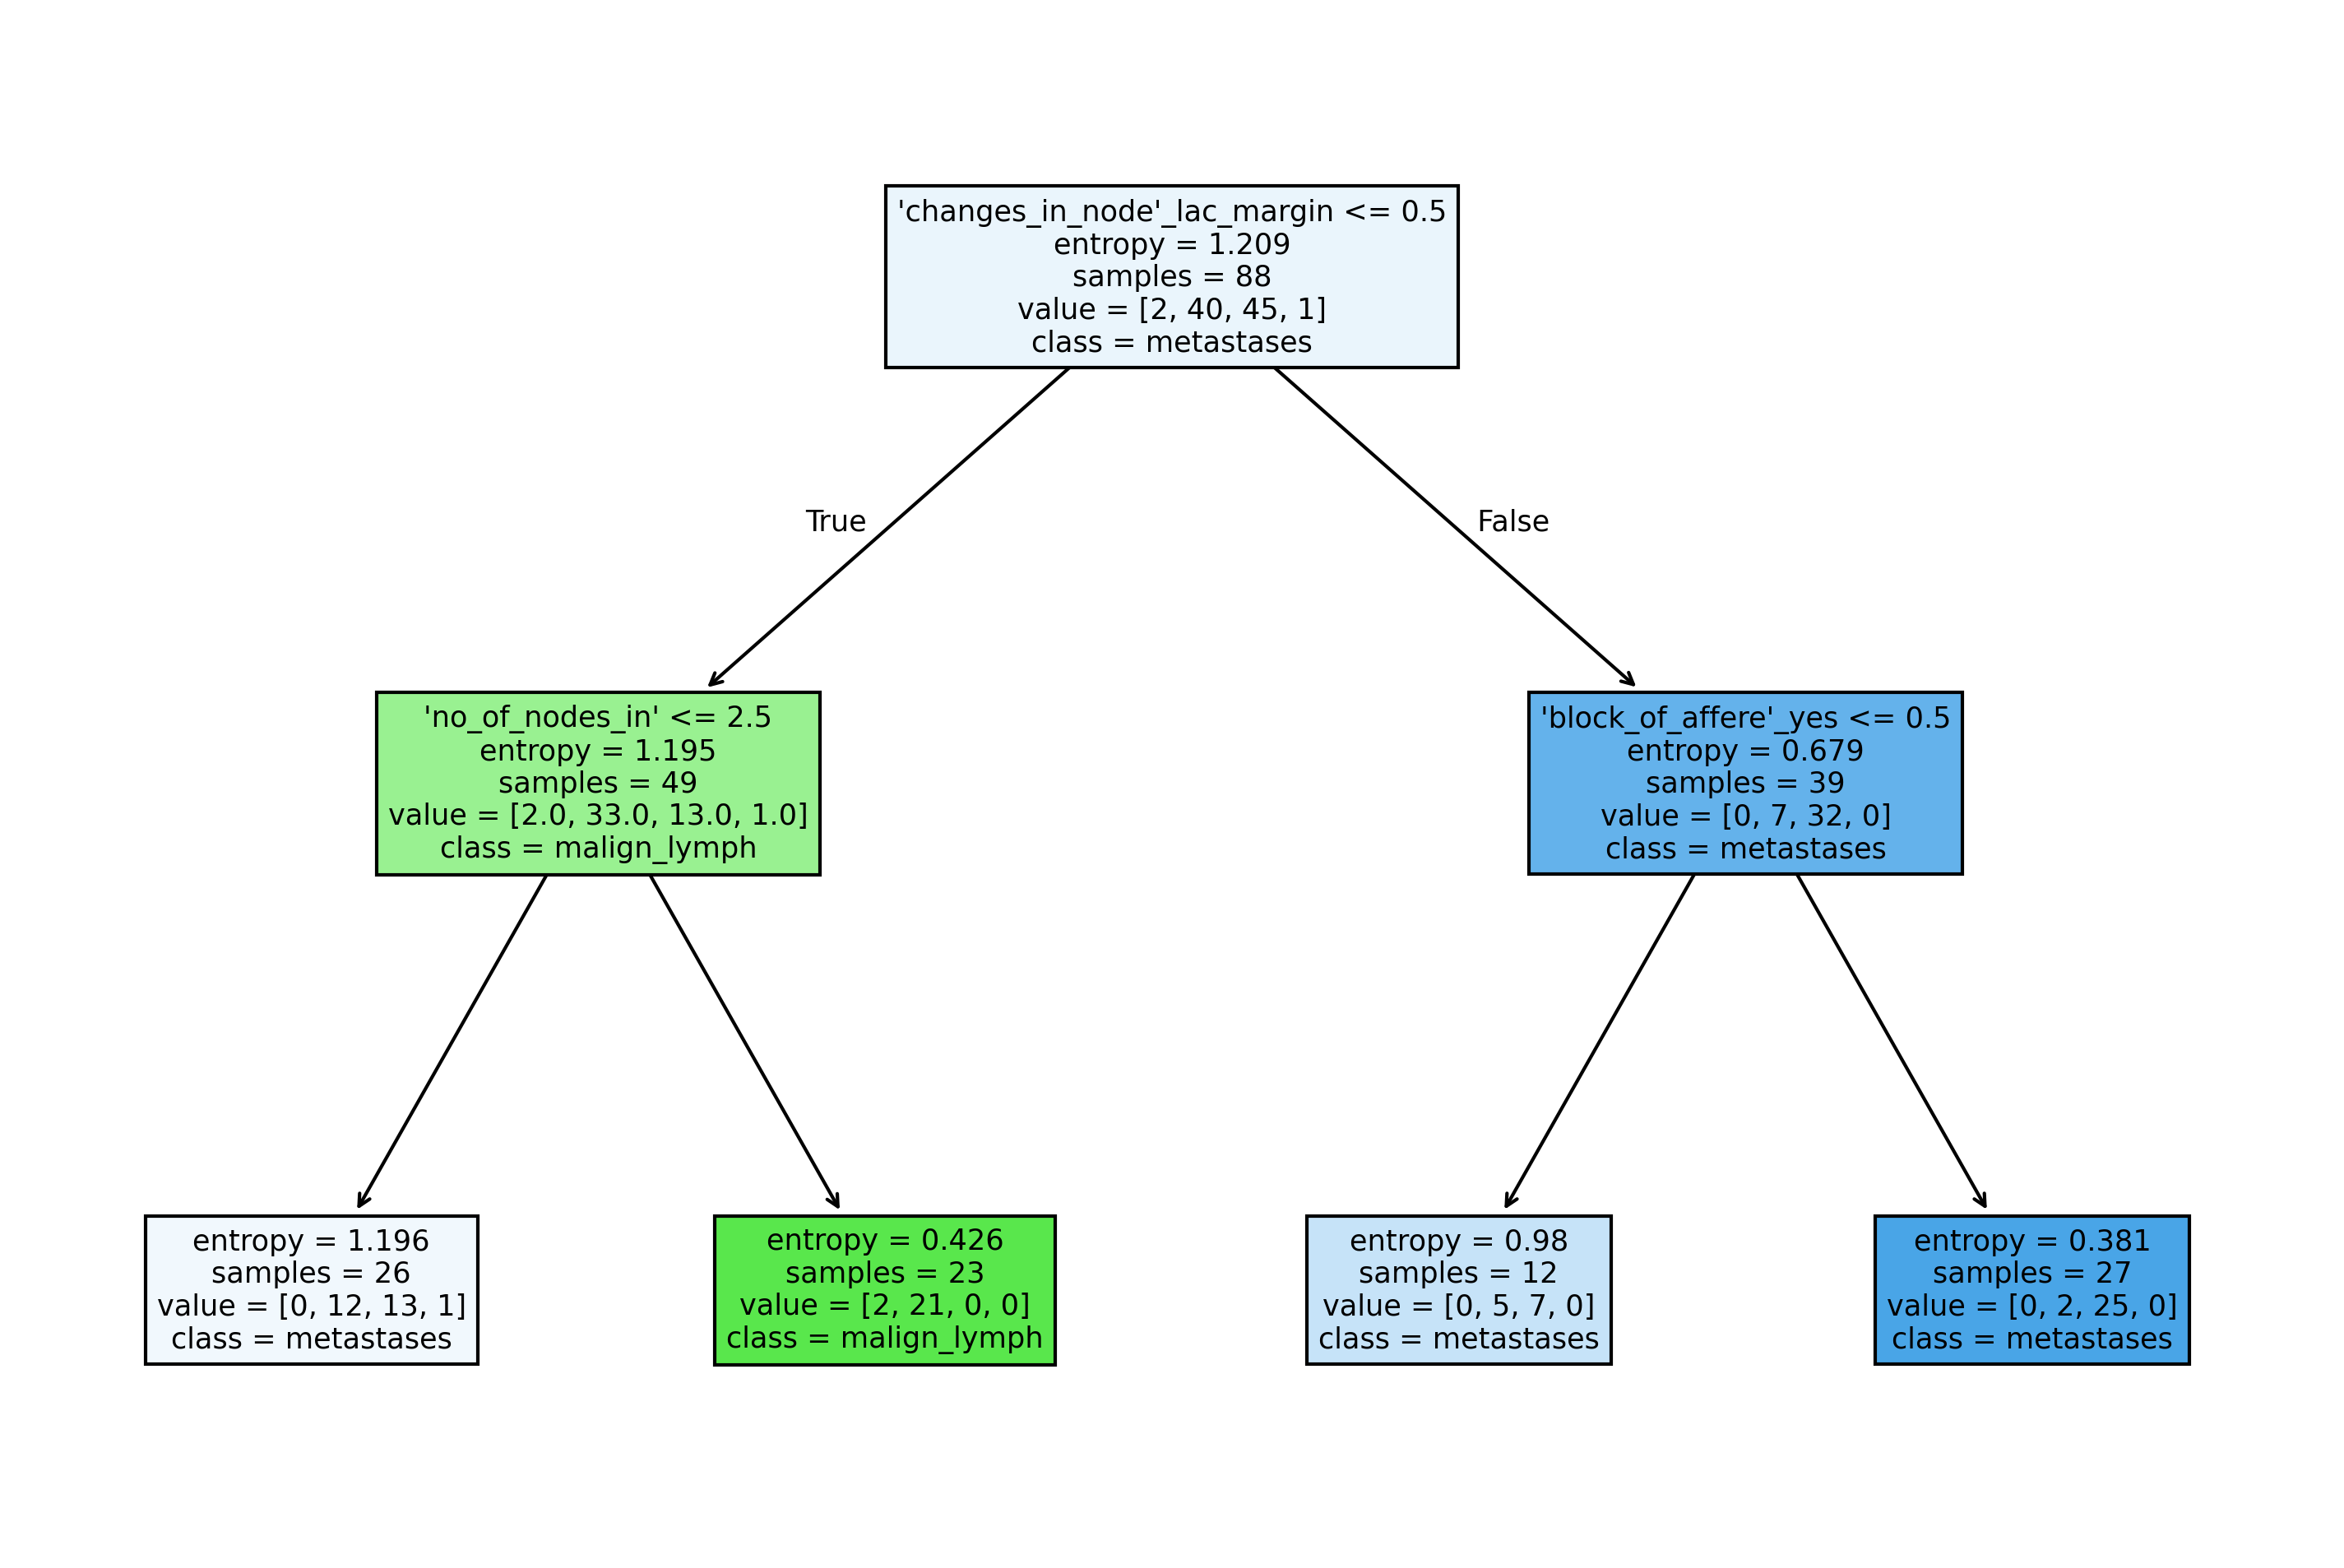

In [12]:

#.............................................................................
# write the rest here

# Initialize and train the Decision Tree Classifier with updated parameter
dt_classifier_b = DecisionTreeClassifier(criterion="entropy", min_samples_split=32, random_state=32)
dt_classifier_b.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_b = dt_classifier_b.predict(X_test)
accuracy_b = accuracy_score(y_test, y_pred_b)
print("Decision Tree Accuracy (min_samples_split=32):", accuracy_b)

# Plot the Decision Tree
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(
    dt_classifier_b,
    filled=True,
    feature_names=X_train.columns,
    class_names=dt_classifier_b.classes_
)
plt.show()

#.............................................................................




---


**Put your discussion here**

After increasing the minimum sample split parameter to 32, the tree is now shallower. This will lead to a less complex and more straightforward structure. This is because a higher minimum sample requirement restricts trees from splitting too early. Except when there are enough samples which will reduce the overall complexity.  Here it will reduce overfitting, however, it might also reduce the tree's capacity to get detailed patterns in the data. It will result in the model being underfitted and this is the reason why the accuracy is 0.77 compared to the previous one with a lower sampling split parameter.






---


# Question 2. (5 points)
##Part (a):
*  Write a Python function named "preprocess" that preprocesses and prepares
datasets for machine learning. It must take a training dataset and an optional test dataset as input. The code must first identify categorical and numerical attributes, then handle missing values by imputing the mean for numerical attributes and the most frequent value for categorical attributes. It is worth noting that to determine if an attribute is numerical, the process should involve checking its data type and potentially examining the number of unique values. This is necessary because an attribute may appear to have an "object" data type but could, in fact, be numerical in nature.

*  Subsequently, the "preprocess" code must standardize the numerical attributes by removing the mean and scaling to unit variance., and encodes categorical attributes using one-hot encoding.

*  If a test dataset is provided, it must undergo the same preprocessing steps, ensuring that the imputation for missing values and data scaling are performed based on the values obtained from the training dataset, thus maintaining consistency between the two datasets.

*  At the end, the function must return the preprocessed training and test datasets as (X_train, y_train, X_test, y_test) tuple if the test dataset exists. Otherwise it must return (X_train, y_train). X stands for independent processed attributes, while y indicates the class attribute.

In [13]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess(train_df, test_df=None):
  #.............................................................................
  # write your codes here

 # Split training data into features and target
    X_train = train_df.iloc[:, :-1].copy()
    y_train = train_df.iloc[:, -1].copy()

    # Convert object columns to numeric where possible
    for col in X_train.columns:
        if X_train[col].dtype == 'object':
            try:
                X_train[col] = pd.to_numeric(X_train[col])
            except ValueError:
                pass  # Leave as categorical if conversion fails

    # Identify numeric and categorical columns
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = [col for col in X_train.columns if col not in numeric_cols]

    # Impute missing values: mean for numeric, most frequent for categorical
    numeric_imputer = SimpleImputer(strategy='mean').fit(X_train[numeric_cols])
    cat_imputer = SimpleImputer(strategy='most_frequent').fit(X_train[cat_cols]) if cat_cols else None

    X_train[numeric_cols] = numeric_imputer.transform(X_train[numeric_cols])
    if cat_cols:
        X_train[cat_cols] = cat_imputer.transform(X_train[cat_cols])

    # Standardize numeric columns
    scaler = StandardScaler().fit(X_train[numeric_cols])
    X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

    # One-hot encode categorical columns
    X_train_cat = pd.get_dummies(X_train[cat_cols], drop_first=True) if cat_cols else pd.DataFrame(index=X_train.index)
    X_train = pd.concat([X_train[numeric_cols], X_train_cat], axis=1)
    final_columns = X_train.columns  # Keep track of final columns for test data alignment

    if test_df is not None:
        # Apply same preprocessing to test data
        X_test = test_df.iloc[:, :-1].copy()
        y_test = test_df.iloc[:, -1].copy()

        for col in X_test.columns:
            if X_test[col].dtype == 'object':
                try:
                    X_test[col] = pd.to_numeric(X_test[col])
                except ValueError:
                    pass

        # Impute missing values
        X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])
        if cat_cols:
            X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

        # Standardize numeric columns
        X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

        # One-hot encode and align columns with training data
        X_test_cat = pd.get_dummies(X_test[cat_cols], drop_first=True) if cat_cols else pd.DataFrame(index=X_test.index)
        X_test = pd.concat([X_test[numeric_cols], X_test_cat], axis=1)
        X_test = X_test.reindex(columns=final_columns, fill_value=0)
  #.............................................................................
        return X_train, y_train, X_test, y_test

    return X_train, y_train


## Part (b)
In this task, your objective is to assess the performance of various machine learning classifiers for a credit classification problem. To ensure result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100. Finally, report the accuracy achieved on the test dataset.

In [14]:
# import necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the training and test datasets
credit_train = pd.read_csv("/content/drive/MyDrive/EECS4412/a3/credit-a-train.csv")
credit_test = pd.read_csv("/content/drive/MyDrive/EECS4412/a3/credit-a-test.csv")

# Preprocess the datasets and split them into features (X) and target (y)
X_train, y_train, X_test, y_test = preprocess(credit_train, credit_test)
  #.............................................................................
  # write your codes here

# Define classification models with necessary parameters
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "KNN(k=1)":     KNeighborsClassifier(n_neighbors=1),
    "KNN(k=3)":     KNeighborsClassifier(n_neighbors=3),
    "GaussianNB":   GaussianNB(),
    "LogisticReg":  LogisticRegression(random_state=42),
    "MLP":          MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train each model on the full training set and evaluate on the test set
print("\nTest Accuracy")
for name, model in models.items():
    model.fit(X_train, y_train)                    # Train the model
    y_pred = model.predict(X_test)                 # Predict on the test set
    test_accuracy = accuracy_score(y_test, y_pred) # Calculate test accuracy
    print(f"{name:15s} Test Accuracy: {test_accuracy:.3f}")


  #.............................................................................


Test Accuracy
DecisionTree    Test Accuracy: 0.855
KNN(k=1)        Test Accuracy: 0.819
KNN(k=3)        Test Accuracy: 0.848
GaussianNB      Test Accuracy: 0.522
LogisticReg     Test Accuracy: 0.862
MLP             Test Accuracy: 0.797
RandomForest    Test Accuracy: 0.899




---


**Put your discussion here**


Each part classifies the various machine learning techniques which have been made by the classification problem. In this case, the RandomForest scored a high accuracy compared to other ones with 89.9%. This helps to reduce overfitting and improves the generalization.
The Logistic Regression and the Decision Tree Classification also performed well scoring 86.2% and 85.5%. The logistic regression suggests that the data might be linearly separable, while the Desecion tree is simpler with is still effective.
In terms of k-nearest Neighbors (k-NN) showed an average performance with k=3 accuracy of 84.8% a little more than k=1 which is 81.9%. This means that if we consider more neighbours, it will help to reduce the noise sensitivity.




---


# Question 3. (4 points)
## Part (a)
 Use the ionosphere dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess the Ionosphere dataset
ionosphere_dataset = pd.read_csv("/content/drive/MyDrive/EECS4412/a3/ionosphere.csv")
X, y = preprocess(ionosphere_dataset)
#.............................................................................
# write your codes here

# Define classification models
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "KNN(k=1)":     KNeighborsClassifier(n_neighbors=1),
    "KNN(k=3)":     KNeighborsClassifier(n_neighbors=3),
    "GaussianNB":   GaussianNB(),
    "LogisticReg":  LogisticRegression(random_state=42),
    "MLP":          MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Set up 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate each model using cross-validation and report error rate
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv)  # Compute accuracy scores
    error_rate = 1 - scores.mean()                 # Calculate error rate
    print(f"{name:15s} Error Rate: {error_rate:.2f}")

#.............................................................................

DecisionTree    Error Rate: 0.12
KNN(k=1)        Error Rate: 0.13
KNN(k=3)        Error Rate: 0.16
GaussianNB      Error Rate: 0.11
LogisticReg     Error Rate: 0.12
MLP             Error Rate: 0.07
RandomForest    Error Rate: 0.07


## Part (b)
 Write a piece of code to perform feature selection using mutual information scores (mutual_info_classif in sklearn) on the processed ionosphere dataset (X) with its corresponding class labels (y). Your code must calculate these scores and then must select the top 5 attributes with the highest scores. Report what are these 5 selected attributes.

In [16]:
# Import the necessary library for feature selection
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
#.............................................................................
# write your codes here

# Calculate mutual information scores with a fixed random state for consistency
mi_scores = mutual_info_classif(X, y, random_state=42)

# Convert to pandas Series for sorting and readability
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Select the top 5 attributes with the highest scores
top5_attributes = mi_series.head(5)
selected_attrs = top5_attributes.index.tolist()

# Display the selected attributes and their scores
print("Top 5 selected attributes based on mutual information scores:")
print(top5_attributes)

#.............................................................................

Top 5 selected attributes based on mutual information scores:
a06    0.297178
a05    0.292443
a08    0.286131
a21    0.279286
a27    0.276162
dtype: float64


##Part (c)
Using only the top five attributes selected by the previous feature selection method, repeat k-fold validation to report the classification errors for each classifier. Then, discuss whether the results for each classifier have improved and explore the potential reasons behind any changes.

In [17]:
# Create a new dataset (X_low_dim) with only the selected attributes
X_low_dim = X[selected_attrs]

#.............................................................................
# write your codes here
# Evaluate models using the reduced dataset with 10-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_low_dim, y, cv=cv)
    error_rate = 1 - scores.mean()  # Calculate error rate
    print(f"{name:15s} Error Rate: {error_rate:.3f}")


#.............................................................................

DecisionTree    Error Rate: 0.097
KNN(k=1)        Error Rate: 0.094
KNN(k=3)        Error Rate: 0.080
GaussianNB      Error Rate: 0.108
LogisticReg     Error Rate: 0.168
MLP             Error Rate: 0.080
RandomForest    Error Rate: 0.074




---


**Put your discussion here**


Using the top five chosen features, models such as RandomForest (7.4%), MLP (8.0%), and KNN(k=3) (8.0%) performed better. This is because there is less overfitting and greater emphasis on the most important features. DecisionTree also performed a bit better with an error rate of 9.7%. Models such as Logistic Regression (16.8%) and GaussianNB (10.8%) performed worse. This could be due to the fact that these models depend more on the complete feature set, and downsampling them would have resulted in loss of valuable linear or independent feature information.




---


 # Question 4. (4 points)
 Report the classification error rate on each data set and the average classification error rate of each method over all the data sets. Rank the methods according to their average classification error rate. For the top two methods (with the lowest average error rates), are their average error rates significantly different? Why? Comparing the method with the lowest average error rate and the one with the highest error rate, are their error rates significantly different? Why? Briefly discuss the results.

 (or result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. Configure the MLP with two hidden layers having 100 and 50 hidden units, and set max_iter to 1000.)


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Define models with parameters
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "KNN(k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN(k=3)": KNeighborsClassifier(n_neighbors=3),
    "GaussianNB": GaussianNB(),
    "LogisticReg": LogisticRegression(random_state=42, max_iter=1000),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dataset details with ID column info
datasets = [
    {"name": "BalanceScale", "path": "/content/drive/MyDrive/EECS4412/a3/q4/balance-scale.csv", "remove_id": False},
    {"name": "Ecoli", "path": "/content/drive/MyDrive/EECS4412/a3/q4/ecoli_with_header.csv", "remove_id": True, "id_col": "Sequence Name"},
    {"name": "Glass", "path": "/content/drive/MyDrive/EECS4412/a3/q4/glass.csv", "remove_id": True, "id_col": "Id"},
    {"name": "Ionosphere", "path": "/content/drive/MyDrive/EECS4412/a3/q4/ionosphere.csv", "remove_id": False},
    {"name": "Iris", "path": "/content/drive/MyDrive/EECS4412/a3/q4/iris.csv", "remove_id": False},
    {"name": "Wine", "path": "/content/drive/MyDrive/EECS4412/a3/q4/wine.csv", "remove_id": False},
    {"name": "Yeast", "path": "/content/drive/MyDrive/EECS4412/a3/q4/yeast.csv", "remove_id": True, "id_col": "SequenceName"}
]

error_rates = {model_name: {} for model_name in models.keys()}
cv = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

# Process datasets and evaluate models
for ds in datasets:
    ds_name = ds["name"]
    df = pd.read_csv(ds["path"])

    # Remove ID column if applicable
    if ds.get("remove_id", False):
        df = df.drop(columns=[ds["id_col"]])

    # Drop rows with missing target values
    target_col = df.columns[0] if ds_name in ["BalanceScale", "Wine"] else df.columns[-1]
    df = df.dropna(subset=[target_col])

    # Define features and target
    y = df[target_col]
    X = df.drop(columns=[target_col])

    # Evaluate models using 10-fold cross-validation
    print(f"Processing dataset: {ds_name}")
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv)
        error_rate = 1 - scores.mean()
        error_rates[model_name][ds_name] = error_rate
        print(f"  {model_name:15s} Error Rate = {error_rate:.3f}")

# Calculate and display average error rates across all datasets
avg_error_rates = {model: np.mean(list(rates.values())) for model, rates in error_rates.items()}
ranked = sorted(avg_error_rates.items(), key=lambda x: x[1])

print("\nAverage Error Rates (across all datasets)")
for model_name, avg_err in ranked:
    print(f"{model_name:15s} Average Error Rate = {avg_err:.3f}")

print("\nRanking of Models")
for i, (model_name, avg_err) in enumerate(ranked, start=1):
    print(f"{i}. {model_name:15s} : {avg_err:.3f}")


Processing dataset: BalanceScale
  DecisionTree    Error Rate = 0.213
  KNN(k=1)        Error Rate = 0.219
  KNN(k=3)        Error Rate = 0.184
  GaussianNB      Error Rate = 0.094
  LogisticReg     Error Rate = 0.144
  MLP             Error Rate = 0.024
  RandomForest    Error Rate = 0.168
Processing dataset: Ecoli
  DecisionTree    Error Rate = 0.193
  KNN(k=1)        Error Rate = 0.191
  KNN(k=3)        Error Rate = 0.146
  GaussianNB      Error Rate = 0.260
  LogisticReg     Error Rate = 0.209
  MLP             Error Rate = 0.134
  RandomForest    Error Rate = 0.149
Processing dataset: Glass
  DecisionTree    Error Rate = 0.340
  KNN(k=1)        Error Rate = 0.281
  KNN(k=3)        Error Rate = 0.312
  GaussianNB      Error Rate = 0.542
  LogisticReg     Error Rate = 0.383
  MLP             Error Rate = 0.382
  RandomForest    Error Rate = 0.205
Processing dataset: Ionosphere
  DecisionTree    Error Rate = 0.120
  KNN(k=1)        Error Rate = 0.134
  KNN(k=3)        Error Rate = 0.



---


**Put your discussion here**

Using 10-fold cross-validation, we evaluated seven distinct classification algorithms on seven different datasets (BalanceScale, Ecoli, Glass, Ionosphere, Iris, Wine, and Yeast): Decision Tree, KNN (with k=1 and k=3), Gaussian Naive Bayes, Logistic Regression, MLP Neural Network, and Random Forest. We calculated the classification error rate for each approach, which is equal to 1 minus the accuracy, for every dataset.We noticed significant variation when examining the individual datasets. For instance, the error rates on the Iris dataset were incredibly low (ranging from roughly 2.7% for MLP and Logistic Regression to 4% for KNN), while the error rates on the Yeast dataset were significantly higher (ranging from approximately 38.6% for Random Forest to 85.6% for GaussianNB).</br>
After averaging the error rates over all datasets, we ranked the models as follows:</br>
	1.	Random Forest: 14.7% </br>
	2.	MLP Neural Network: 18.7% </br>
	3.	Logistic Regression: 19.7% </br>
	4.	Decision Tree: 21.7% </br>
	5.	KNN (k=3): 22.4% </br>
	6.	KNN (k=1): 23.1% </br>
	7.	Gaussian Naive Bayes: 27.5% </br>
The average error rates of the top two methods, Random Forest and MLP, are 14.7% and 18.7%, respectively. Gap is around 4%. Their overall performance is quite similar and result will not different much without test more on different variations. On the other side, there is a large differences around 13 percentage between the best-performing approach (Random Forest, at 14.7%) and the worst-performing one (GaussianNB, at 27.5%). This significant difference shows that, in contrast to the more reliable, Random Forest, GaussianNB performs bad on these varied datasets, most likely as a result of its reliance on regularly distributed data and assumption of feature independence.

In conclusion,these results indicate that while ensemble methods like Random Forest tend to deliver more consistent performance across a range of datasets, simpler models such as GaussianNB may be less effective when data characteristics vary widely.





---


#Question 5. (14 points)

In [19]:

# IMPORTS

import pandas as pd
import numpy as np

# For preprocessing, model selection, and metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, make_scorer, confusion_matrix
from sklearn.pipeline import Pipeline


# XGBoost classifier
!pip install xgboost --quiet
from xgboost import XGBClassifier


# DATA LOADING

train_data = pd.read_csv('/content/drive/MyDrive/EECS4412/a3/q5/risk-train.txt', sep='\s+')
test_data  = pd.read_csv('/content/drive/MyDrive/EECS4412/a3/q5/risk-test.txt', sep='\s+')


# EXTRACT FEATURES AND TARGET

# The target column is "CLASS", and the ID column is "ORDER_ID".
X = train_data.drop(columns=["CLASS"])   # features
y = train_data["CLASS"]                  # target ("no"/"yes")

# Save ORDER_ID for final predictions
test_ids = test_data["ORDER_ID"]

# Remove ORDER_ID from features
X = X.drop(columns=["ORDER_ID"])
X_test = test_data.drop(columns=["ORDER_ID"])

# Convert target labels to numeric: 'no' -> 0, 'yes' -> 1
y_numeric = y.map({'no': 0, 'yes': 1})


# SPLIT INTO TRAIN/VALIDATION SET

X_train, X_val, y_train, y_val = train_test_split(X, y_numeric, test_size=0.3, random_state=42)


# PREPROCESSING PIPELINE

numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


#DEFINE THE XGBOOST CLASSIFIER (COST-SENSITIVE)

# Use objective 'binary:logistic' and tune scale_pos_weight for cost sensitivity.
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Create a pipeline that first preprocesses the data then fits XGBoost.
model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', xgb_clf)
])


#HYPERPARAMETER TUNING WITH GRID SEARCH

# Tune n_estimators, max_depth, and scale_pos_weight (the cost-sensitive parameter).
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20],
    'classifier__scale_pos_weight': [8, 10, 12]  # Adjust based on imbalance
}

# Define a custom F1 scorer with positive label as 1 (which corresponds to "yes")
f1_scorer = make_scorer(f1_score, pos_label=1)

grid_search = GridSearchCV(
    model_pipeline,
    param_grid,
    scoring=f1_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters from GridSearch:", grid_search.best_params_)
print("Best F1 score from GridSearch:", grid_search.best_score_)

best_model = grid_search.best_estimator_


# THRESHOLD TUNING ON THE VALIDATION SET

# For XGBoost, predict_proba returns probabilities for classes [0,1].
# We'll use the probability for class 1 ("yes").
val_probs = best_model.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0.0, 1.0, 101)
best_threshold = 0.5
lowest_cost = float('inf')

for t in thresholds:
    # Predict class 1 ("yes") if probability >= t, else 0 ("no")
    y_val_pred = np.where(val_probs >= t, 1, 0)

    # Compute confusion matrix: rows = actual, columns = predicted, labels [1, 0]
    cm = confusion_matrix(y_val, y_val_pred, labels=[1, 0])
    TP = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    TN = cm[1, 1]

    # Calculate misclassification cost: FN*50 + FP*5
    cost = FN * 50 + FP * 5
    if cost < lowest_cost:
        lowest_cost = cost
        best_threshold = t

print(f"Best threshold on validation set: {best_threshold}")
print(f"Lowest cost on validation set: {lowest_cost}")


#FINAL PREDICTIONS ON TEST SET

# Get predicted probabilities for class 1 on the test set
test_probs = best_model.predict_proba(X_test)[:, 1]
# Apply best threshold
test_preds_numeric = np.where(test_probs >= best_threshold, 1, 0)
# Convert predictions back to original labels
test_predictions = np.where(test_preds_numeric == 1, "yes", "no")

output_df = pd.DataFrame({
    'ORDER_ID': test_ids,
    'CLASS': test_predictions
})

# Save to a plain text file with space-separated columns
output_df.to_csv('prediction.txt', sep=' ', index=False, header=True)
print("prediction.txt has been saved.")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters from GridSearch: {'classifier__max_depth': 10, 'classifier__n_estimators': 50, 'classifier__scale_pos_weight': 10}
Best F1 score from GridSearch: 0.23155980767558562
Best threshold on validation set: 0.36
Lowest cost on validation set: 21615
prediction.txt has been saved.


**For question 5, your detailed report should be presented in a separate PDF file.**